# Safety and qulity control classification (binary)

## 1 - Project context
Edenor is an electrical distribution company en Buenos Aires, Argentina. In order to ensure the safety and quality of the electrical projects, edenor supervises the work performed by contractors.

Each control can include the various checks that need to be supervised, and the control may include photos that reflect the tasks overseen.

It's important to have traceability of every control. This includes:
- Date
- Contractor name
- Superviser name
- Checkpoints overseen and the qualification associated
- Pictures taken and what the picture shows


## 2 - Motivation of the project

Most of the data of the controls can be taken and analysed from a structured database.

However, is not possible to explain what you can see in each of the image taken from the controls.

This is what motivates to create a machine learning model that can tell whatever it is on the image and let the user to utilize this information however they need.

Some of the possible ideas are:
- Filter every control of a contractor where some element appears. For example: Does this control includes vallado or not?
- Check how many of the images show good or bad jobs. And may be grouping by different tasks or elements shown in the picture
- TODO

The way this project is going work is by different stages. One in top of the other in a sequential way. By solving each of the previous stages we will be able to solve the next stage

## 3 - Dataset
At this moment the company has 30000 pictures of different quality and safety controls taken by the supervisors

# Stage 1: Binary classification

## 1 - Defining the scope
In this phase we need to determine whether an image includes a contractor fence or not.

## 2 - Solution proposal
To solve this problem the proposed solution is to build a binary classificator by using a Convolutional Neural Network that is able to predict wheter a new picture shown is a contractor fence or not

## 3 - Solution

### Importing libraries

In [46]:
import requests
import re
import numpy as np
import os
from bs4 import BeautifulSoup
import pandas as pd
from io import BytesIO
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib.pyplot import imshow
from datetime import datetime
import matplotlib.pyplot as plt
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}

### Importing the dataset

This data is stored in an csv an includes:
- Url of the picture
- The tag whether is a fence (vallado) or not

In [2]:
imagenes_controles_df = pd.read_csv('Imagenes controles etiquetados.csv')
imagenes_controles_df.head()

,uri,tag,Vallado_,ID,Creado,Confirma_etiqueta
0,https://field.voolks.com/api/containers/field-...,NaN,0,5899,23/5/2024,0
1,https://field.voolks.com/api/containers/field-...,NaN,1,5900,23/5/2024,0
2,https://field.voolks.com/api/containers/field-...,NaN,0,5901,23/5/2024,0
3,https://field.voolks.com/api/containers/field-...,NaN,0,5902,23/5/2024,0
4,https://field.voolks.com/api/containers/field-...,NaN,1,5903,23/5/2024,0


### Downloading the images
We are going to download each image to the local disk

In [3]:
def save_image(url,folder_path,class_):
    file_path=""
    try:
        
        folder_path = os.path.join(folder_path,class_)
        common_image_value = "608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-"
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        response = requests.get(url)
        if response.status_code==200:

            filename = url.split('/')[-1].replace(common_image_value,"")
            
            # Combina el folder_path con el filename
            file_path = os.path.join( folder_path,filename)

            # Abre un archivo binario para escribir
            with open(file_path, 'wb') as f:
                f.write(response.content)
    except:
        print(f"No se pudo guardar la imagen {url} de clase {class_}")  
    return file_path

#### Setting the classes

In [4]:
classes = {
    1 : "Vallado",
    0 : "No vallado"
}

#### Importing all the images

In [5]:
path = "dataset_a_validar"
tiempo_inicial = datetime.now()
X_dataset=[]
y_dataset = []
next_start = 18370
for index, url in enumerate(imagenes_controles_df['uri'][next_start:]):
    class_number = imagenes_controles_df['Vallado_'][index+next_start]
    x_train = save_image(url,path,classes[class_number]
                             )
    if (index%10==0 ):
        tiempo_temp = datetime.now()
        print(f"Imagenes cargadas: {index + next_start}" )
        print(f"Tiempo de carga:{tiempo_temp - tiempo_inicial}")
        print(f"Image: {x_train}")
#X_dataset = [download_image(url) for url in imagenes_controles_df['uri']][10000:15000]
#y_dataset = imagenes_controles_df['Vallado_'][10000:15000]
tiempo_final = datetime.now()

tiempo_procesamiento = tiempo_final-tiempo_inicial
print(f"Tiempo de procesamiento: {tiempo_procesamiento}")

Imagenes cargadas: 18370
Tiempo de carga:0:00:02.917495
Image: dataset_a_validar/No vallado/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-axsvcpvge-1699874495726.jpg
Imagenes cargadas: 18380
Tiempo de carga:0:00:32.964900
Image: dataset_a_validar/No vallado/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-jil25a1gj-1699874537172.jpg
Imagenes cargadas: 18390
Tiempo de carga:0:01:13.779894
Image: dataset_a_validar/No vallado/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-jil25a1gj-1699815093061.jpg
Imagenes cargadas: 18400
Tiempo de carga:0:02:04.604295
Image: dataset_a_validar/No vallado/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-jil25a1gj-1699796995241.jpg
Imagenes cargadas: 18410
Tiempo de carga:0:02:38.281468
Image: dataset_a_validar/No vallado/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-jil25a1gj-1699551293372.jpg
Imagenes cargadas: 18420
Tiempo de carga:0:03:16.782156
Image: dataset_a_validar/No vallado/608aa366bc79f75644bf4e6b.603

0 - 9450  Tiempo de carga: 9:04:48.749774

9450 - 11310 Tiempo de carga: 5:32:00.648129

11310 - 11370 Tiempo de carga: 0:02:14.090066

11370 - 15440 Tiempo de carga:4:47:44.767645

15440 - 17190 Tiempo de carga:2:06:32.238175

18250 - 18370 Tiempo de carga:0:19:25.835653


### Creating the dataset and splitting into Training and Validation Sets

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "dataset/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 18438 files belonging to 2 classes.
Using 14751 files for training.
Found 18438 files belonging to 2 classes.
Using 3687 files for validation.


### Picking the images and its classes

2024-05-31 18:40:12.981922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


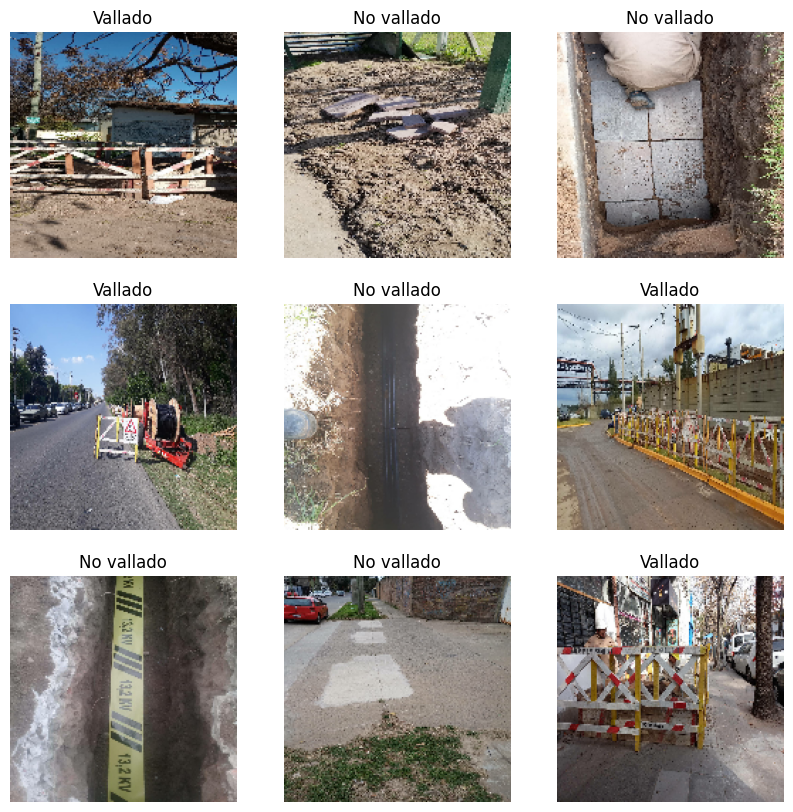

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Preprocess and Augment Training Data

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
def data_augmenter():

    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.05))
 
    return data_augmentation

### Watching the image and the image augmentation

2024-05-31 18:40:14.260037: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


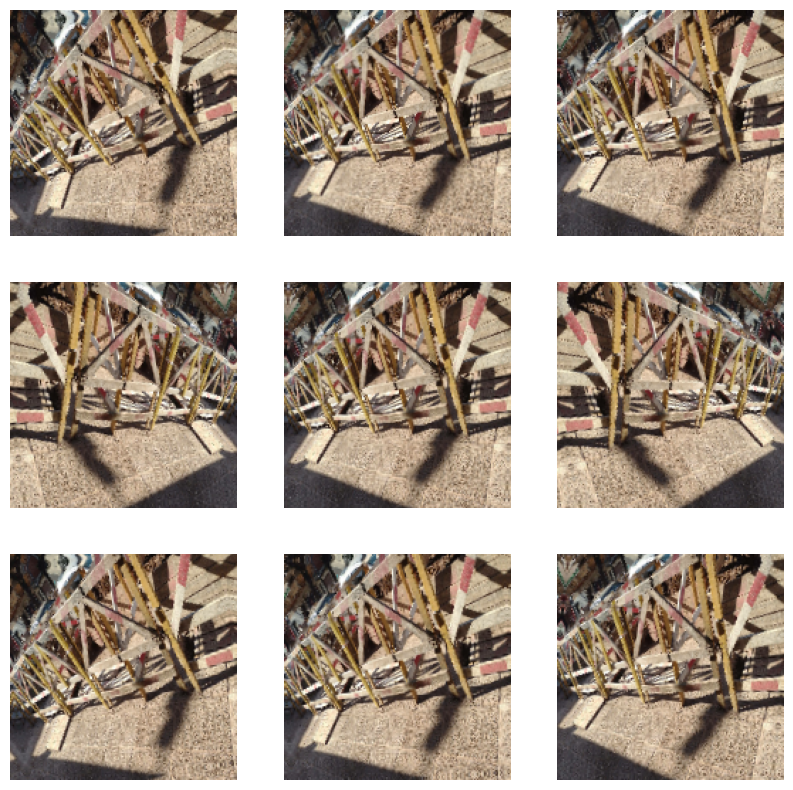

In [10]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

### Using MobileNetV2 for Transfer Learning

In [11]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [12]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

In [13]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

Let's choose the first batch from the tensorflow dataset to run this images through the MobileNetV2 base model, and test out the predictions made on some of the images

In [14]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


In [15]:
#Shows the different label probabilities in one tensor 
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int32)>

In [47]:
#base_model.trainable = False
#image_var = tf.Variable(preprocess_input(image_batch))
#pred = base_model(image_var)

#tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(), top=2)

Of course they make no sense, because our class it's not included in the classification model

### Layer Freezing with the Functional API and creation of the model
We are going to use the pretrained model and modify the classifier task.

Then, we create the model

In [48]:

def vallado_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):

    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet') 
    base_model.trainable = False 
    inputs = tf.keras.Input(shape=input_shape) 

    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False) 
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    outputs = tf.keras.layers.Dense(1,activation='linear')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [18]:
model = vallado_model(IMG_SIZE, data_augmentation)

### Compiling the model

In [19]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
initial_epochs = 5
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 119s 253ms/step - accuracy: 0.8729 - loss: 0.2792 - val_accuracy: 0.9165 - val_loss: 0.1808
Epoch 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 128s 278ms/step - accuracy: 0.9276 - loss: 0.1823 - val_accuracy: 0.9333 - val_loss: 0.1595
Epoch 3/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 120s 260ms/step - accuracy: 0.9329 - loss: 0.1689 - val_accuracy: 0.9398 - val_loss: 0.1561
Epoch 4/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 119s 258ms/step - accuracy: 0.9351 - loss: 0.1682 - val_accuracy: 0.9317 - val_loss: 0.1625
Epoch 5/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 120s 260ms/step - accuracy: 0.9374 - loss: 0.1617 - val_accuracy: 0.9373 - val_loss: 0.1548


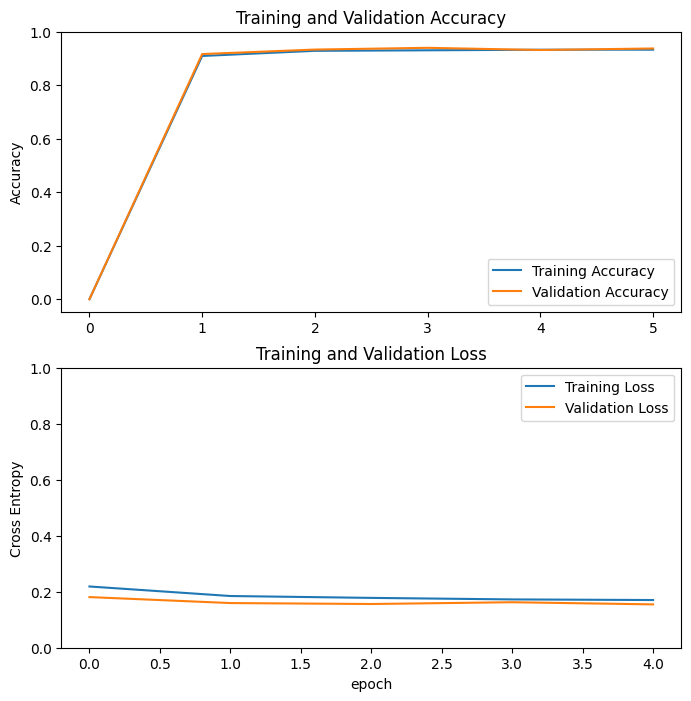

In [21]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
class_names

['No vallado', 'Vallado']

## Fine-tunning the Model
We could try fine-tuning the model by re-running the optimizer in the last layers to improve accuracy.

In [23]:
# UNQ_C3
base_model = model.layers[2]
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

### START CODE HERE

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  154


In [24]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 162s 341ms/step - accuracy: 0.9187 - loss: 0.2018 - val_accuracy: 0.9384 - val_loss: 0.1915
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 143s 310ms/step - accuracy: 0.9489 - loss: 0.1331 - val_accuracy: 0.9477 - val_loss: 0.1535
Epoch 7/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 145s 315ms/step - accuracy: 0.9608 - loss: 0.0999 - val_accuracy: 0.9317 - val_loss: 0.1561
Epoch 8/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 148s 322ms/step - accuracy: 0.9711 - loss: 0.0807 - val_accuracy: 0.9327 - val_loss: 0.1690
Epoch 9/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 148s 320ms/step - accuracy: 0.9768 - loss: 0.0611 - val_accuracy: 0.9178 - val_loss: 0.1892
Epoch 10/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 150s 325ms/step - accuracy: 0.9796 - loss: 0.0552 - val_accuracy: 0.9354 - val_loss: 0.1706


In [25]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

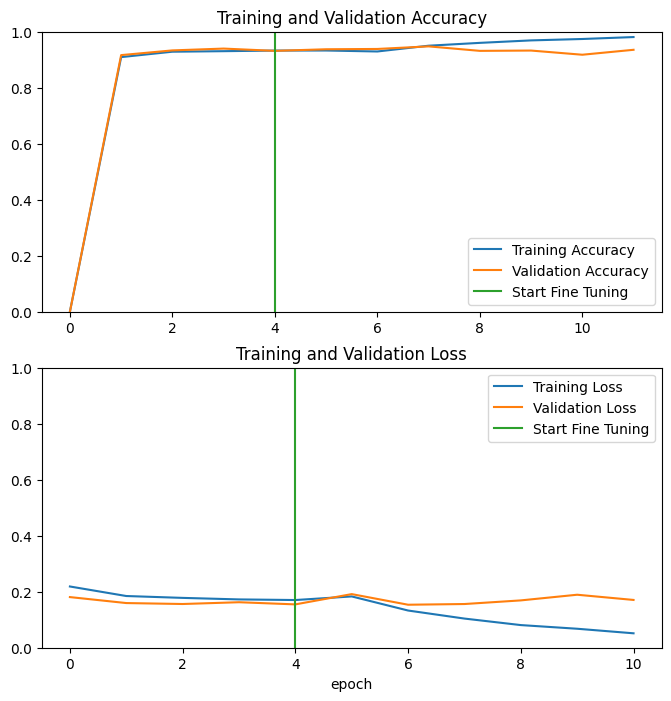

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Foto rowing prueba :1.3773247

In [27]:
img_path ="dataset/Vallado/kacb12c6j-1701371981121.jpg"
#img_path ="dataset/No vallado/ach9xgfbz-1658928112205.jpg"



## Downloading web images

In [28]:
def download_image(url):
    try:
        response = requests.get(url)
        img = load_img(BytesIO(response.content),target_size=(160,160))
        #img_array = img_to_array(img) 
        #resize_image = img_array /255.0
        return img
    except:
        print("No se pudo realizar el request")
        return None

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow


### Prediction function

In [30]:
#url= "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-kacb12c6j-1701355911684.jpg"


def image_prediction(path_image,model,url:bool):
    
    if (url):
        img = download_image(path_image)   
    else:
        img = image.load_img(path_image, target_size=(160, 160))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = x/255.0]
    x2 = x 
    print('Input image shape:', x.shape)
    imshow(img)
    prediction = model.predict(x2)
    print("Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ", prediction)
    pred_class = (prediction > 1).astype(int)
    class_name = class_names[pred_class[0][0]]
    print(f"Class name: {class_name}")

## Saving the model

In [95]:
print(keras.__version__)

3.3.3


In [31]:
model.save("vallado_classifier.keras")

In [92]:
# Guardar la arquitectura del modelo en formato JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Guardar los pesos del modelo en formato HDF5
model.save_weights("model_weights.weights.h5")


## Loading the model

In [33]:
from tensorflow.keras.models import load_model
modelito = load_model("vallado_classifier.keras")

### Making some predictions

In [34]:
class_names = {
    1 : "Vallado",
    0 : "No vallado"
}

Input image shape: (1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[4.011493]]
Class name: Vallado


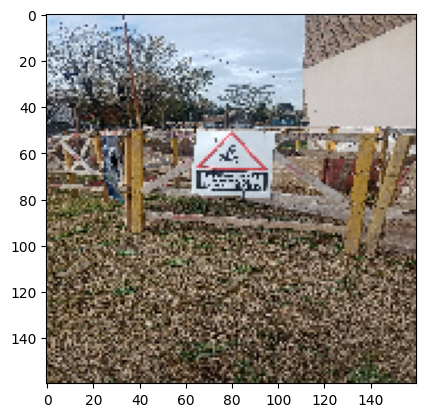

In [43]:
#img_path ="dataset/Vallado/kacb12c6j-1703269902501.jpg"
img_path=  "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.6050d1eea0122e1b00c16ff5-photo-7un0fbbdf-1717175201312.jpg"
image_prediction(img_path,modelito,url=True)

Input image shape: (1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[-8.501999]]
Class name: No vallado


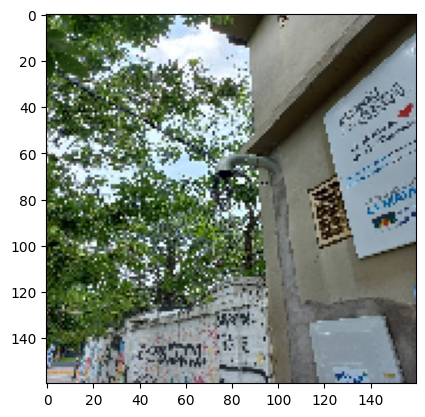

In [41]:
#img_path ="dataset/Vallado/kacb12c6j-1703269902501.jpg"
img_path="dataset/No vallado/photo-jil25a1gj-1702487802264.jpg"
image_prediction(img_path,modelito,url=False)


In [ ]:
from huggingface_hub import notebook_login

notebook_login()



In [ ]:
from huggingface_hub import upload_file
upload_file("vallado_model.h5","vallado_model.h5",repo_id="vallado_classification")

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="vallado_model.h5",    # Path to the file or a file-like object
    path_in_repo="vallado_model.h5",       # Where the file should be stored in the repo
    repo_id="BrunoJaime/vallado_classification" # The repo ID (username/repo_name                 # Optional, set to "dataset" for dataset repos
)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    "modelo_mio",
    evaluation_strategy="steps",
    logging_steps=5,
    num_train_epochs=10,
    push_to_hub=True
)

2024-05-19 01:16:25.959752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 01:16:26.255112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 01:16:27.873174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
trainer = Trainer(
    model = model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    compute_metrics='accuracy'
)

In [ ]:
import tensorflow as tf

# Carga tu modelo original
model = tf.keras.models.load_model('vallado_model.h5')

# Convierte el modelo a cuantificación post-entrenamiento
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Guarda el modelo cuantificado
with open('modelo_cuantificado.tflite', 'wb') as f:
    f.write(tflite_quant_model)